# Introduction to TensorFlow in Python
#### Course Description
Not long ago, cutting-edge computer vision algorithms couldn’t differentiate between images of cats and dogs. Today, a skilled data scientist equipped with nothing more than a laptop can classify tens of thousands of objects with greater accuracy than the human eye. In this course, you will use TensorFlow 2.1 to develop, train, and make predictions with the models that have powered major advances in recommendation systems, image classification, and FinTech. You will learn both high-level APIs, which will enable you to design and train deep learning models in 15 lines of code, and low-level APIs, which will allow you to move beyond off-the-shelf routines. You will also learn to accurately predict housing prices, credit card borrower defaults, and images of sign language gestures.

In [50]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

constant = tf.constant

# 1. Introduction to TensorFlow

Before you can build advanced models in TensorFlow 2.0, you will first need to understand the basics. In this chapter, you’ll learn how to define constants and variables, perform tensor addition and multiplication, and compute derivatives. Knowledge of linear algebra will be helpful, but not necessary.

### Defining data as constants
Throughout this course, we will use tensorflow version 2.1 and will exclusively import the submodules needed to complete each exercise. This will usually be done for you, but you will do it in this exercise by importing constant from tensorflow.

After you have imported constant, you will use it to transform a numpy array, credit_numpy, into a tensorflow constant, credit_constant. This array contains feature columns from a dataset on credit card holders and is previewed in the image below. We will return to this dataset in later chapters.

Note that tensorflow version 2.0 allows you to use data as either a numpy array or a tensorflow constant object. Using a constant will ensure that any operations performed with that object are done in tensorflow.

This image shows four feature columns from a dataset on credit card default: education, marriage, age, and bill amount.

#### Instructions

- Import the constant submodule from the tensorflow module.
- Convert the credit_numpy array into a constant object in tensorflow. Do not set the data type.

In [2]:
credit_numpy = pd.read_csv('data/uci_credit_card.csv').iloc[:,:4]
credit_numpy = credit_numpy.to_numpy()


In [3]:
# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('The datatype is:', credit_constant.dtype)

# Print constant shape
print('The shape is:', credit_constant.shape)

The datatype is: <dtype: 'float64'>
The shape is: (30000, 4)


### Defining variables
Unlike a constant, a variable's value can be modified. This will be quite useful when we want to train a model by updating its parameters. Constants can't be used for this purpose, so variables are the natural choice.

Let's try defining and working with a variable. Note that Variable(), which is used to create a variable tensor, has been imported from tensorflow and is available to use in the exercise.

#### Instructions

- Define a variable, A1, as the 1-dimensional tensor: [1, 2, 3, 4].
- Print A1. Do not use the .numpy() method. What did this tell you?
- Apply .numpy() to A1 and assign it to B1.
- Print B1. What did this tell you?

In [4]:
Variable =  tf.Variable
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print(A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print(B1)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]


### Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the ⊙ symbol, is shown below:

$
\begin{bmatrix}
1&2 \\ 2&1 
\end{bmatrix} 
\odot
\begin{bmatrix}
3&2 \\ 1&5
\end{bmatrix} = 
\begin{bmatrix}
3 & 4 \\ 2 & 5
\end{bmatrix} 
$

In this exercise, you will perform element-wise multiplication, paying careful attention to the shape of the tensors you multiply. Note that multiply(), constant(), and ones_like() have been imported for you.

### Instructions

-  Define the tensors A1 and A23 as constants.
-  Set B1 to be a tensor of ones with the same shape as A1.
-  Set B23 to be a tensor of ones with the same shape as A23.
-  Set C1 and C23 equal to the element-wise products of A1 and B1, and A23 and B23, respectively.

In [5]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

# Perform element-wise multiplication
C1 = tf.multiply(A1,B1)
C23 = tf.multiply(A23,B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


### Making predictions with matrix multiplication
In later chapters, you will learn to train linear regression models. This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

<img src="im1.JPG" width=200 />

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().

#### Instructions

- Define features, params, and bill as constants.
- Compute the predicted value vector, billpred, by multiplying the input data, features, by the parameters, params. Use matrix multiplication, rather than the element-wise product.
- Define error as the targets, bill, minus the predicted values, billpred.

In [6]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = tf.matmul(features,params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


### Reshaping tensors
Later in the course, you will classify images of sign language letters using a neural network. In some cases, the network will take 1-dimensional tensors as inputs, but your data will come in the form of images, which will either be either 2- or 3-dimensional tensors, depending on whether they are grayscale or color images.

The figure below shows grayscale and color images of the sign language letter A. The two images have been imported for you and converted to the numpy arrays gray_tensor and color_tensor. Reshape these arrays into 1-dimensional vectors using the reshape operation, which has been imported for you from tensorflow. Note that the shape of gray_tensor is 28x28 and the shape of color_tensor is 28x28x3.

This figure shows grayscale and color images of the sign language letter "A".

#### Instructions

- Reshape gray_tensor from a 28x28 matrix into a 784x1 vector named gray_vector.
- Reshape color_tensor from a 28x28x3 tensor into a 2352x1 vector named color_vector.

In [7]:
from arrays import *

In [8]:
# Reshape the grayscale image tensor into a vector
gray_vector = tf.reshape(gray_tensor, (784, 1))

# Reshape the color image tensor into a vector
color_vector = tf.reshape(color_tensor, (2352, 1))

### Optimizing with gradients
You are given a loss function, y=x2, which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

<img src="gradient_plot.png" width=300 />


The image shows a plot of y equals x squared. It also shows the gradient at x equals -1, x equals 0, and x equals 1.

In practice, you will use a high level tensorflow operation to perform gradient descent automatically. In this exercise, however, you will compute the slope at x values of -1, 1, and 0. The following operations are available: GradientTape(), multiply(), and Variable().

#### Instructions

- Define x as a variable with the initial value x0.
- Set the loss function, y, equal to x multiplied by x. Do not make use of operator overloading.
- Set the function to return the gradient of y with respect to x.
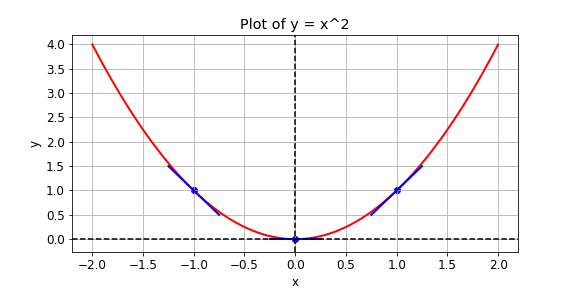

In [9]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = tf.Variable(x0)
	with tf.GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = x*x
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


### Working with image data
You are given a black-and-white image of a letter, which has been encoded as a tensor, letter. You want to determine whether the letter is an X or a K. You don't have a trained neural network, but you do have a simple model, model, which can be used to classify letter.

The 3x3 tensor, letter, and the 1x3 tensor, model, are available in the Python shell. You can determine whether letter is a K by multiplying letter by model, summing over the result, and then checking if it is equal to 1. As with more complicated models, such as neural networks, model is a collection of weights, arranged in a tensor.

Note that the functions reshape(), matmul(), and reduce_sum() have been imported from tensorflow and are available for use.

#### Instructions

- The model, model, is 1x3 tensor, but should be a 3x1. Reshape model.
- Perform a matrix multiplication of the 3x3 tensor, letter, by the 3x1 tensor, model.
- Sum over the resulting tensor, output, and assign this value to prediction.
- Print prediction using the .numpy() method to determine whether letter is K.

In [10]:
letter = np.array([[1., 0., 1.], [1., 1., 0.], [1., 0., 1.]])
model = np.array([[ 1.,  0., -1.]])

In [11]:
# Reshape model from a 1x3 to a 3x1 tensor
model = tf.reshape(model, (3, 1))

# Multiply letter by model
output = tf.matmul(letter, model)

# Sum over output and print prediction using the numpy method
prediction = tf.reduce_sum(output)
print(prediction.numpy())

1.0


# 2. Linear models

In this chapter, you will learn how to build, solve, and make predictions with models in TensorFlow 2.0. You will focus on a simple class of models – the linear regression model – and will try to predict housing prices. By the end of the chapter, you will know how to load and manipulate data, construct loss functions, perform minimization, make predictions, and reduce resource use with batch training.

### Load data using pandas
Before you can train a machine learning model, you must first import data. There are several valid ways to do this, but for now, we will use a simple one-liner from pandas: pd.read_csv(). Recall from the video that the first argument specifies the path or URL. All other arguments are optional.

In this exercise, you will import the King County housing dataset, which we will use to train a linear model later in the chapter.

#### Instructions

- Import pandas under the alias pd.
- Assign the path to a string variable with the name data_path.
- Load the dataset as a pandas dataframe named housing.
- Print the price column of housing.

In [12]:
# Assign the path to a string variable named data_path
data_path = 'data/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing.price)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


### Setting the data type
In this exercise, you will both load data and set its type. Note that housing is available and pandas has been imported as pd. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price'].

#### Instructions

- Import numpy and tensorflow under their standard aliases.
- Use a numpy array to set the tensor price to have a data type of 32-bit floating point number
- Use the tensorflow function cast() to set the tensor waterfront to have a - Boolean data type.
- Print price and then waterfront. Did you notice any important differences?

In [13]:

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


### Loss functions in TensorFlow
In this exercise, you will compute the loss using data from the King County housing dataset. You are given a target, price, which is a tensor of house prices, and predictions, which is a tensor of predicted house prices. You will evaluate the loss function and print out the value of the loss.

#### Instructions
- Import the keras module from tensorflow. Then, use price and predictions to compute the mean squared error (mse).
- Modify your code to compute the mean absolute error (mae), rather than the mean squared error (mse).

In [14]:
predictions = tf.cast(housing.predictions, tf.float32)

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

# Compute the mean absolute error (mae)
loss = keras.losses.mae(price, predictions)

# Print the mean absolute error (mae)
print(loss.numpy())

141307270000.0
268921.97


### Modifying the loss function
In the previous exercise, you defined a tensorflow loss function and then evaluated it once for a set of actual and predicted values. In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.

#### Instructions

- Define a variable, scalar, with an initial value of 1.0 and a type of float32.
- Define a function called loss_function(), which takes scalar, features, and targets as arguments in that order.
- Use a mean absolute error loss function.


In [27]:
targets = constant(np.array([ 2.,  4.,  6.,  8., 10.], dtype=np.float32))
features = constant(np.array([1.,2.,3.,4.,5.]), dtype=np.float32)

In [28]:
# Initialize a variable named scalar
scalar = Variable(1.0, tf.float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


### Set up a linear regression
A univariate linear regression identifies the relationship between a single feature and the target tensor. In this exercise, we will use a property's lot size and price. Just as we discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

In this exercise, you will define the model and the loss function. You will then evaluate the loss function for two different values of intercept and slope. Remember that the predicted values are given by intercept + features*slope. Additionally, note that keras.losses.mse() is available for you. Furthermore, slope and intercept have been defined as variables.

#### Instructions

- Define a function that returns the predicted values for a linear regression using intercept, features, and slope, and without using add() or multiply().
- Complete the loss_function() by adding the model's variables, intercept and slope, as arguments.
- Compute the mean squared error using targets and predictions.

In [40]:
price_log = np.log(price)
size_log = np.log(housing.sqft_lot)

In [41]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mean_squared_error(targets,predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.448336689515
71.86728197085229


### Train a linear model
In this exercise, we will pick up where the previous exercise ended. The intercept and slope, intercept and slope, have been defined and initialized. Additionally, a function has been defined, loss_function(intercept, slope), which computes the loss using the data and model variables.

You will now define an optimization operation as opt. You will then train a univariate linear model by minimizing the loss to find the optimal values of intercept and slope. Note that the opt operation will try to move closer to the optimum with each step, but will require many steps to find it. Thus, you must repeatedly execute the operation.

#### Instructions

- Initialize an Adam optimizer as opt with a learning rate of 0.5.
- Apply the .minimize() method to the optimizer.
- Pass loss_function() with the appropriate arguments as a lambda function to .minimize().
- Supply the list of variables that need to be updated to var_list.

In [42]:
def plot_results(intercept, slope):
        size_range = np.linspace(6,14,100)
        price_pred = [intercept+slope*s for s in size_range]
        plt.scatter(size_log, price_log, color = 'black')
        plt.plot(size_range, price_pred, linewidth=3.0, color='red')
        plt.xlabel('log(size)')
        plt.ylabel('log(price)')
        plt.title('Scatterplot of data and fitted regression line')
        plt.show()

9.681749
11.737402
1.1300178
1.6701479
0.8092006
0.812697
0.6221346
0.6119664
0.5934977
0.5704044


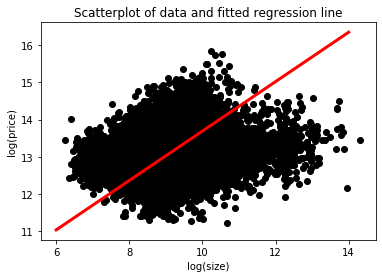

In [51]:
intercept = Variable(5.)
slope = Variable(0.001)
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

### Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

You will use price_log as your target and size_log and bedrooms as your features. Each of these tensors has been defined and is available. You will also switch from using the the mean squared error loss to the mean absolute error loss: keras.losses.mae(). Finally, the predicted values are computed as follows: params[0] + feature1*params[1] + feature2*params[2]. Note that we've defined a vector of parameters, params, as a variable, rather than using three variables. Here, params[0] is the intercept and params[1] and params[2] are the slopes.

#### Instructions

- Define a linear regression model that returns the predicted values.
- Set loss_function() to take the parameter vector as an input.
- Use the mean absolute error loss.
- Complete the minimization operation.

In [63]:
bedrooms = housing.bedrooms.to_numpy(dtype = np.float32 )
params = Variable(np.array([0.1 , 0.05, 0.02], dtype=np.float32))

def print_results(params):
        return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                     .format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), 
                             params[2].numpy()))

In [65]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.422, intercept: 0.102, slope_1: 0.050, slope_2: 0.022
loss: 12.418, intercept: 0.103, slope_1: 0.050, slope_2: 0.023
loss: 12.413, intercept: 0.104, slope_1: 0.050, slope_2: 0.024
loss: 12.409, intercept: 0.105, slope_1: 0.050, slope_2: 0.025
loss: 12.405, intercept: 0.106, slope_1: 0.050, slope_2: 0.026
loss: 12.400, intercept: 0.107, slope_1: 0.050, slope_2: 0.027
loss: 12.396, intercept: 0.108, slope_1: 0.050, slope_2: 0.028
loss: 12.392, intercept: 0.109, slope_1: 0.050, slope_2: 0.029
loss: 12.387, intercept: 0.110, slope_1: 0.050, slope_2: 0.030
loss: 12.383, intercept: 0.111, slope_1: 0.050, slope_2: 0.031


### Preparing to batch train
Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

Variable(), keras(), and float32 have been imported for you. Note that you should not set default argument values for either the model or loss function, since we will generate the data in batches during the training process.

#### Instructions

- Define intercept as having an initial value of 10.0 and a data type of 32-bit float.
- Define the model to return the predicted values using intercept, features, and slope.
- Define a function called loss_function() that takes intercept, slope, targets, and features as arguments. Do not set default argument values.
- Define the mean squared error loss function using targets and predictions.

In [67]:
# Define the intercept and slope
intercept = Variable(10.0, tf.float32)
slope = Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope* features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mean_squared_error(targets, predictions)

### Training a linear model in batches
In this exercise, we will train a linear regression model in batches, starting where we left off in the previous exercise. We will do this by stepping through the dataset in batches and updating the model's variables, intercept and slope, after each step. This approach will allow us to train with datasets that are otherwise too large to hold in memory.

Note that the loss function,loss_function(intercept, slope, targets, features), has been defined for you. Additionally, keras has been imported for you and numpy is available as np. The trainable variables should be entered into var_list in the order in which they appear as loss function arguments.

#### Instructions

- Use the .Adam() optimizer.
- Load in the data from 'kc_house_data.csv' in batches with a chunksize of 100.
- Extract the price column from batch, convert it to a numpy array of type 32-bit float, and assign it to price_batch.
- Complete the loss function, fill in the list of trainable variables, and perform minimization.

# 3. Neural Networks

The previous chapters taught you how to build models in TensorFlow 2.0. In this chapter, you will apply those same tools to build, train, and make predictions with neural networks. You will learn how to define dense layers, apply activation functions, select an optimizer, and apply regularization to reduce overfitting. You will take advantage of TensorFlow's flexibility by using both low-level linear algebra and high-level Keras API operations to define and train models.

# 4. High Level APIs

In the final chapter, you'll use high-level APIs in TensorFlow 2.0 to train a sign language letter classifier. You will use both the sequential and functional Keras APIs to train, validate, make predictions with, and evaluate models. You will also learn how to use the Estimators API to streamline the model definition and training process, and to avoid errors.